In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

# High Level Statistics:

---




In [3]:
haberman = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Assignments/haberman.csv')
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
haberman.head()

# Col1=age of patient during operation, col2=year of operation, col3=number of positive axillary nodes detected, col4=survival status
# Survival status 1= the patient survived 5 years or longer , 2= the patient died within 5 years

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
print(haberman.shape) 

# Rows = 306 columns = 4

(306, 4)


In [6]:
haberman.head(2)  

# Prints the first 2 datasets

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1


In [7]:
haberman.tail(3)     

# Prints the last 3 datasets

,age,year,nodes,status
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [8]:
print(haberman.columns)      

# Prints all the columns present in the datas

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [9]:
haberman['status'].value_counts()     

# It counts the number of unique values, that a particular column is having

# In status column there are 225 patients who lived more than 5 years and 81 patients who died within 5 years

1    225
2     81
Name: status, dtype: int64

In [10]:
print(haberman.info())

# There are no missing value in the data

# All the data types are of type integer
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [11]:
haberman.describe()

# There are patients with age group 30 to 83 with a median age of 52 and with standard deviation of 10.803452

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Univariate analysis :

---



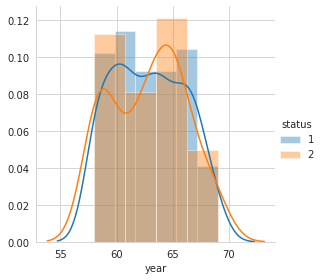

In [12]:
sns.set_style('whitegrid')
n=sns.FacetGrid(haberman, hue='status', size=4)
n.map(sns.distplot, 'year')
n.add_legend()
plt.show()
# Patients who had their operations in 1965 died quickly than other patients .

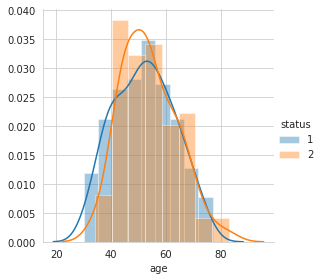

In [13]:
sns.set_style('whitegrid')
l=sns.FacetGrid(haberman, hue='status', size=4)
l.map(sns.distplot, 'age')
l.add_legend()
# From below plot we can conclude that patients with age group 40 to 60 died most

# Patients with age group ~55 , survived most

# Patients less than age 40 are more likely to survive as the overlap of data is very less

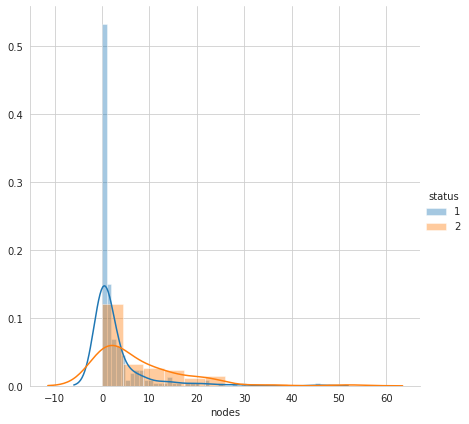

In [14]:
sns.set_style('whitegrid')
a=sns.FacetGrid(haberman, hue='status', size=6 ) 
a.map(sns.distplot, 'nodes') 
a.add_legend()
plt.show()

# x axis = nodes , y axis = counts i.e number of nodes
# Patients with 0 and 1 node are more likely to survive more than the patients with nodes more than that.

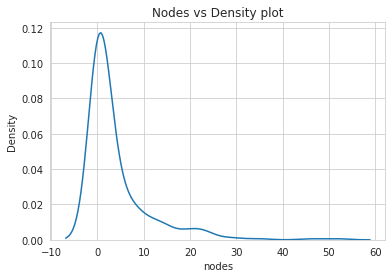

In [15]:
sns.kdeplot(data = haberman, x="nodes")
plt.title('Nodes vs Density plot')
plt.show()

# It gives the probability density for a given amount of nodes in a patient

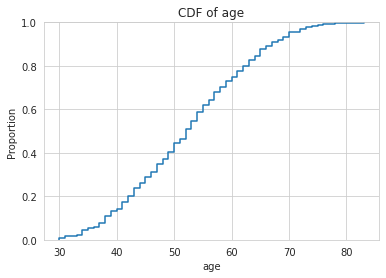

In [16]:
sns.ecdfplot(data=haberman, x='age')
plt.title('CDF of age')
plt.show()

# It gives the CDF for a given age group
# e.g : patients with age group < = 50 is 40%

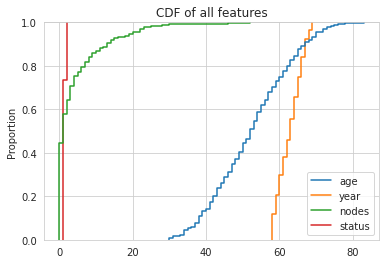

In [17]:
sns.ecdfplot( data = haberman )
plt.title('CDF of all features')
plt.show()

# This plot shows all the CDF of all the given features.

# Bivariate Analysis :

---



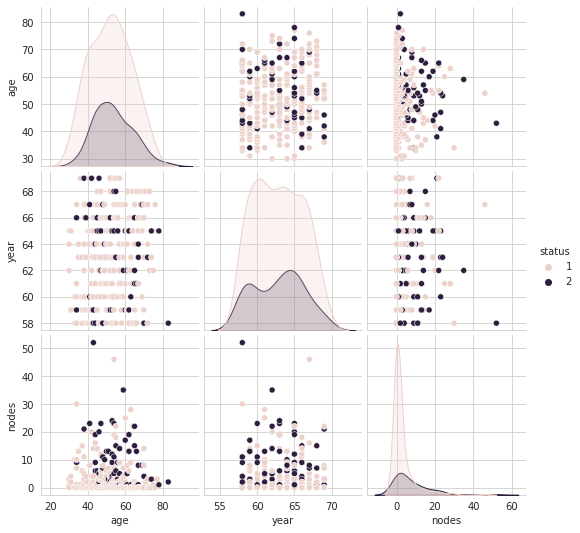

In [18]:
sns.pairplot(data = haberman , hue = 'status')
plt.show()
# Pair plot takes all the possible combination of pairs and plots it
# We can observe that patients with more nodes died within 5 years from (age vs nodes) plot

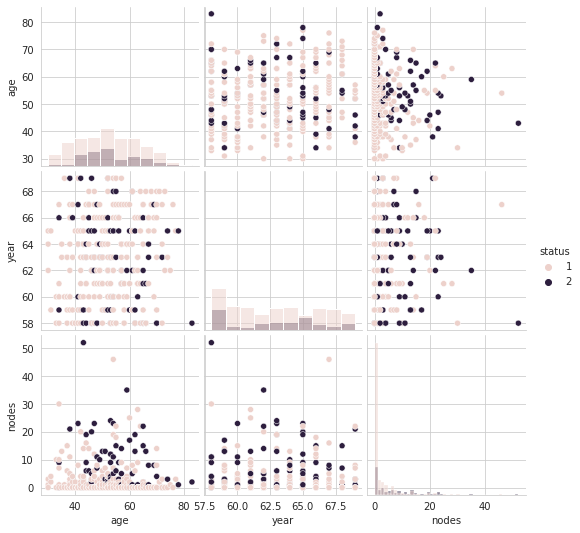

In [19]:
sns.pairplot(data = haberman , hue = 'status' , diag_kind='hist') 
plt.show()

# Here the diagonal plots are histogram as we have mentioned in (diag_kind = 'hist')

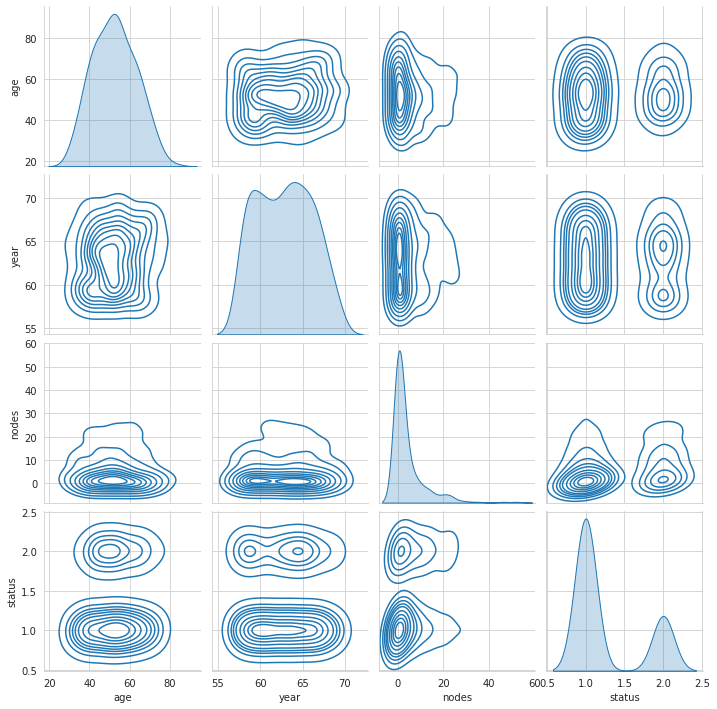

In [20]:
sns.pairplot(data = haberman , kind = 'kde' )
plt.show()

# As the number of nodes increases the contour goes away from the survival status 1 in (status vs nodes) plot
# Other plots are not making much sense

<function matplotlib.pyplot.show>

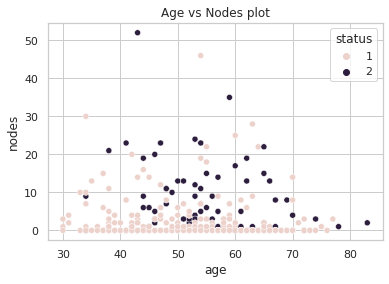

In [21]:
sns.set(style='whitegrid')
sns.scatterplot(x='age' , y='nodes' , hue = 'status' , data=haberman ) 
plt.title('Age vs Nodes plot')
plt.show
# It seems that patients who died were having more nodes

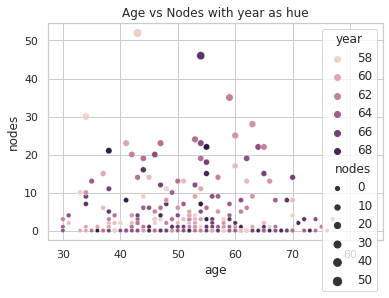

In [22]:
sns.set(style='whitegrid')
sns.scatterplot(x='age' , y='nodes' , hue = 'year' , data=haberman , size = 'nodes').set_title('Age vs Nodes with year as hue')
plt.show()
# Size parameter increases the size of the dots in ascending order 

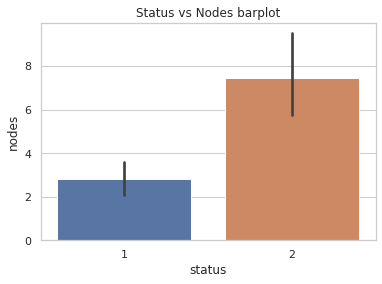

In [23]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(x='status' , y='nodes' , data=haberman )
plt.title('Status vs Nodes barplot')
plt.show()
# Patients having more nodes died more, within 5 years

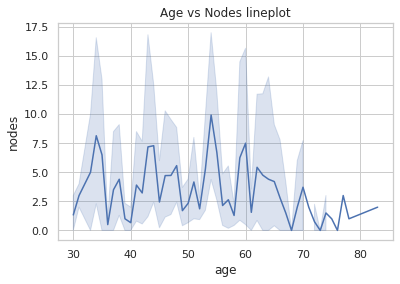

In [24]:
sns.lineplot( x = 'age' , y = 'nodes' , data=haberman)
plt.title('Age vs Nodes lineplot')
plt.show()
# It shows ~55 age group patients are having highest amount of nodes

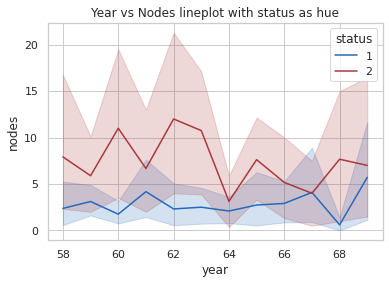

In [25]:

sns.lineplot( y = 'nodes' , x = 'year' , hue = 'status' , palette= 'vlag' , data=haberman)
plt.title('Year vs Nodes lineplot with status as hue')
plt.show()

# In 1962 and 1960 the death was higher , patients having more nodes

# In 1964 the death was lowest with patients having lesser nodes

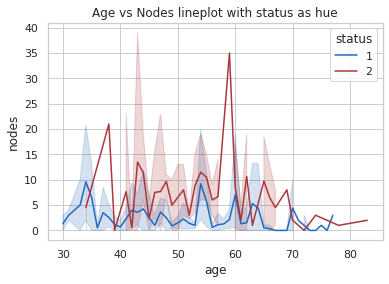

In [26]:
sns.lineplot( x = 'age' , y = 'nodes' , hue = 'status' , palette= 'vlag' , data=haberman)
plt.title('Age vs Nodes lineplot with status as hue')
plt.show()

# It shows ~58 age group patients are having more nodes and died within 5 years 
# We can conclude that patients with more nodes died quicker than patients with less nodes

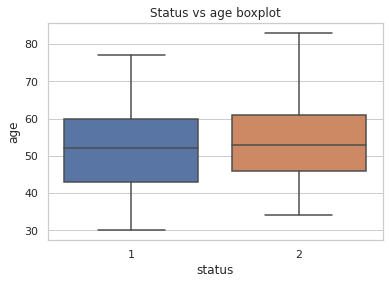

In [27]:
sns.boxplot( x = 'status' , y = 'age' , data = haberman)
plt.title('Status vs age boxplot')
plt.show()

# The patients who died and who survived more than 5 years , their age are nearly same i.e ~53 and ~52 respectively
# So this plot doesnt make much sense as there is over lapping of data is more than ~ 96%

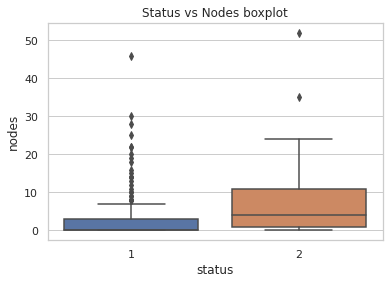

In [28]:
sns.boxplot( x = 'status' , y = 'nodes' , data = haberman)
plt.title('Status vs Nodes boxplot')
plt.show()
# Patients who survived had less nodes and median is almost 0 but in case of ptients who died median nodes were ~3 and upto ~12
# So number of nodes can be taken as a feature to analyze

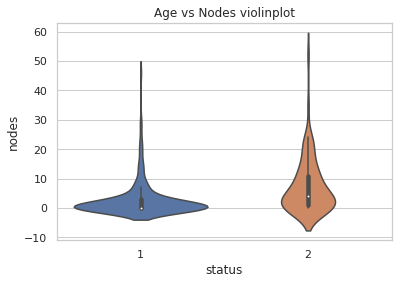

In [29]:
sns.violinplot( x = 'status' , y = 'nodes' , data = haberman )
plt.title('Age vs Nodes violinplot')
plt.show()

# Patients who survived more than 5 years had almost 0 nodes but in case of patients who died within 5 years were having almost ~3 nodes

Conclusion:


---


From above plots we can conclude that the number of nodes is the most important feature in the breast cancer diagnosis.
As the number of nodes increases the patient is more likely to die.